<style>
    .yellow {
        background-color: #EADE07;
    }
     .blue {
        background-color: #074D9D;
    }
</style>




<center><h1><font color='D40F19'>Case Study: Expanding our candy brand in the Czech Republic</font></h1></center>
<center><h2>My analysis of the Candy Power Ranking dataset</h2> </center>
<center><h3>Data by Miguel</h3></center>
<center><h3><a href="https://www.datascientist.cz">www.datascientist.cz</a></h3></center>

# 1. Scenario
A supermarket chain in the Czech Republic wants to widen its candy assortment. These are home brand candies. The idea is to create a brand-new product. 

The market research data on which the decision can be made is the Candy Power Ranking dataset.

# 2. Data
The data set is located at
https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking
The data set is provided by FiveThirtyEight under the Creative Commons Attribution 4.0 International license (https://creativecommons.org/licenses/by/4.0/)

In [1]:
#libraries that need to be imported
#basic libraries
import pandas as pd
import numpy as np
#libraries for plots
import seaborn as sns
import matplotlib.pyplot as plt
#library to stody the multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
#library to build the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data
data = pd.read_csv("candy-data.csv")


# 3. EXPLORATORY DATA ANALYSIS (EDA)


## 3.1. Preliminary exploration

In [3]:
print(data.head())
print(data.describe())

  competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   
3                 0     0    0         0         0.011         0.511   
4                 0     0    0         0         0.906         0.511   

   winpercent  
0   66.971725  
1   67.602936  
2   32.261086  
3   46.116505  
4   52.341465  
       chocolate     fruity    caramel

------------------------------
<font color='green'> 
<i>The variables ["winpercent", "pricepercent", "sugarpercent"] are numerical (the frist one is a percentage, the other two are percentiles)
The variables ["chocolate","fruity","caramel","peanutyalmondy","nougat","crispedricewafer","hard","bar","pluribus"] are binary. Binary variables have only two possible values (0 , 1)</i></font>
<b>Since winpercent is in a scale 0-100 and the rest of the variables are in a scale 0-1 we will divide winpercent by 100 </b>
------------------------------ 

In [4]:
data["winpercent"]=data["winpercent"]/100

In [5]:
data.isna().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

------------------------------
<font color='green'><i>The dataset is clean. There are 85 observations and no missing values. Also it has been checked that binary variables take only the values 0 or 1 and that the percentages and percentiles are in the range 0-100.</i></font>

------------------------------

## 3.2. Distribution of the variables

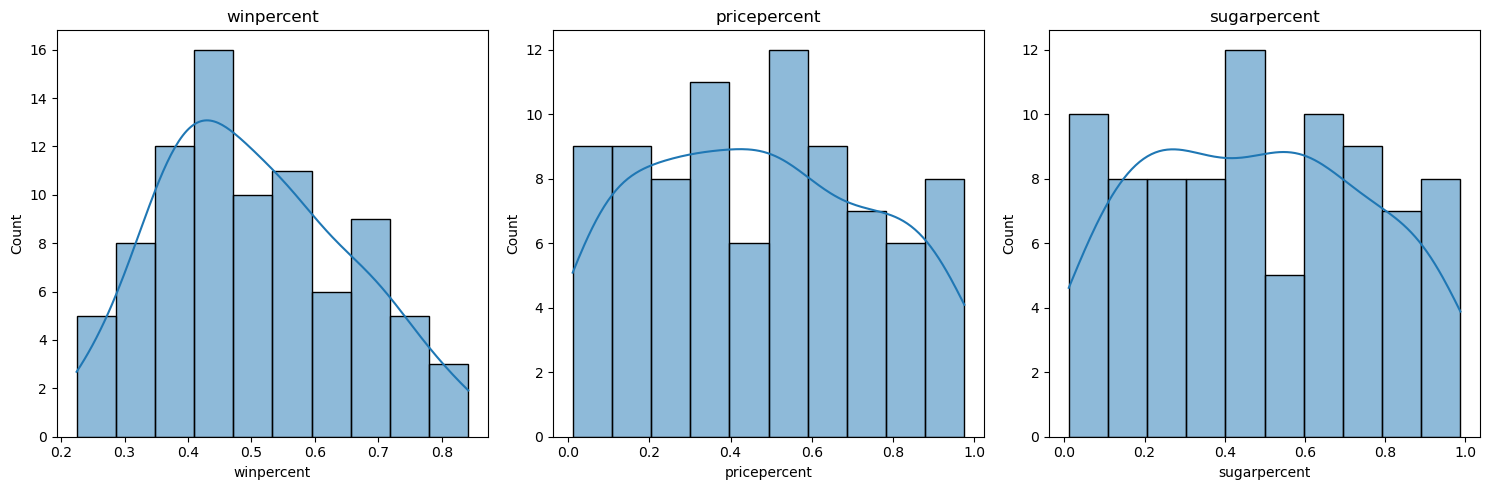

In [6]:
#lets study the distributions of the variables.
# Select numerical features
numerical_features = ["winpercent", "pricepercent", "sugarpercent"]
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))  
for i, col in enumerate(numerical_features):
    sns.histplot(data=data, x=col, ax=axes[i], kde=True, bins=10)  # Use seaborn in each subplot
    axes[i].set_title(col)  # Set title for each subplot

plt.tight_layout()  # Adjust spacing between subplots
plt.show()



------------------------------
<font color='green'><i>Notice that, while winpercent is a percentage, pricepercent and sugarpercent are percentiles. Therefore, the winpercent has kind of a bell-shape (although right skewed) and pricepercent and sugarpercent are more or less uniform. The fat that they are not perfectly uniform (which should be as per definition of percentiles), indicates that some data of the original dataset have been erased, and that is probably the reason why the dataset is "clean" in terms of missing values.</i></font>

------------------------------

#### Binary variables vs. winpercent

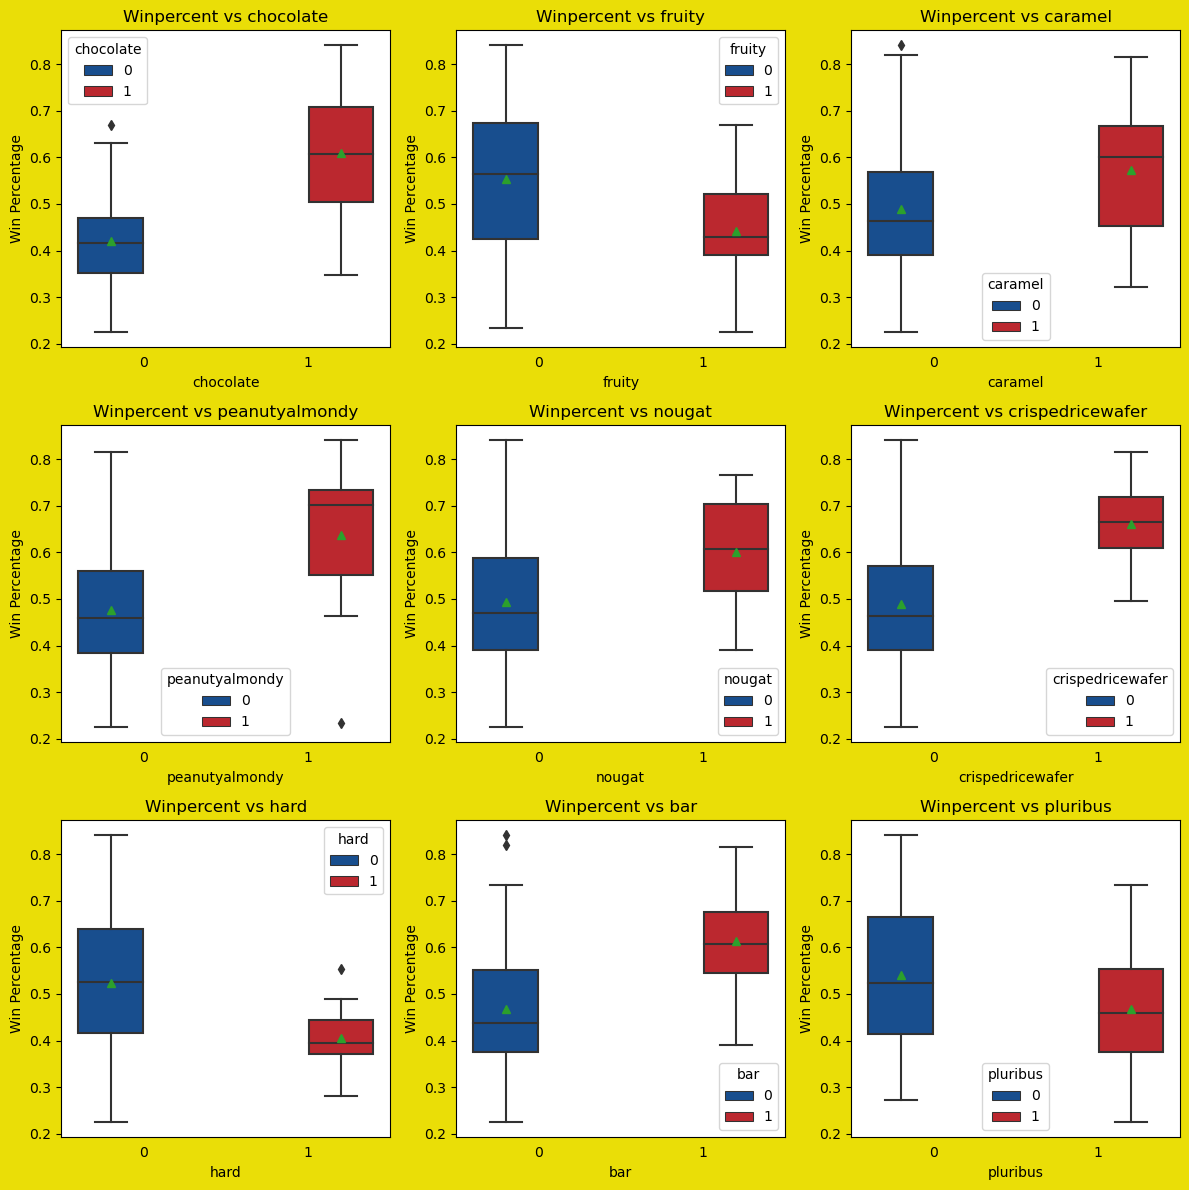

In [7]:
#for the study of the binary variables, it is more convenient the boxplot comparison. 


# List of binary variables
binary_vars = [
    "chocolate",
    "fruity",
    "caramel",
    "peanutyalmondy",
    "nougat",
    "crispedricewafer",
    "hard",
    "bar",
    "pluribus",
]
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))  # Create a figure with 3x3 subplots

# Counter to iterate through axes
ax_counter = 0

for i in range(rows):
    for j in range(cols):
        if ax_counter >= len(binary_vars):  # Stop if all variables are plotted
            break

        var = binary_vars[ax_counter]

        # Subset data based on binary variable value
        data_0 = data.loc[data[var] == 0]
        data_1 = data.loc[data[var] == 1]

        # Create double boxplot on current axis
        sns.boxplot(
            x=var,
            y="winpercent",
            showmeans=True,
            data=pd.concat([data_0, data_1], ignore_index=True),
            hue=var,
            palette=['#054DA1', '#D40F19'],
            ax=axes[i, j],
        )

        # Customize plot (optional)
        axes[i, j].set_title(f"Winpercent vs {var}")
        axes[i, j].set_xlabel(var)
        axes[i, j].set_ylabel("Win Percentage")
        axes[i, j].tick_params(bottom=False)  # Remove x-axis ticks for inner subplots

        ax_counter += 1  # Increment counter

# Adjust spacing and display and background color
fig.patch.set_facecolor('#EADE07')
plt.tight_layout()
plt.savefig('binary_variables_comparison winpercent.jpg', format='jpg')

plt.show()



------------------------------
<font color='green'><i>For the estimation of "winrate", according to the box and whiskers diagrams, "chocolate" and "crispedricewafer" seem to have the best predictive values, because the boxes for 0 and 1 do not overlap, also "peanutyalmondy" and "bar" seem to have a good predictive value. "hard" is also a good candidate of estimating variable, although seems to correlate inversely.</i></font>

------------------------------

#### Binary variables vs. pricepercent

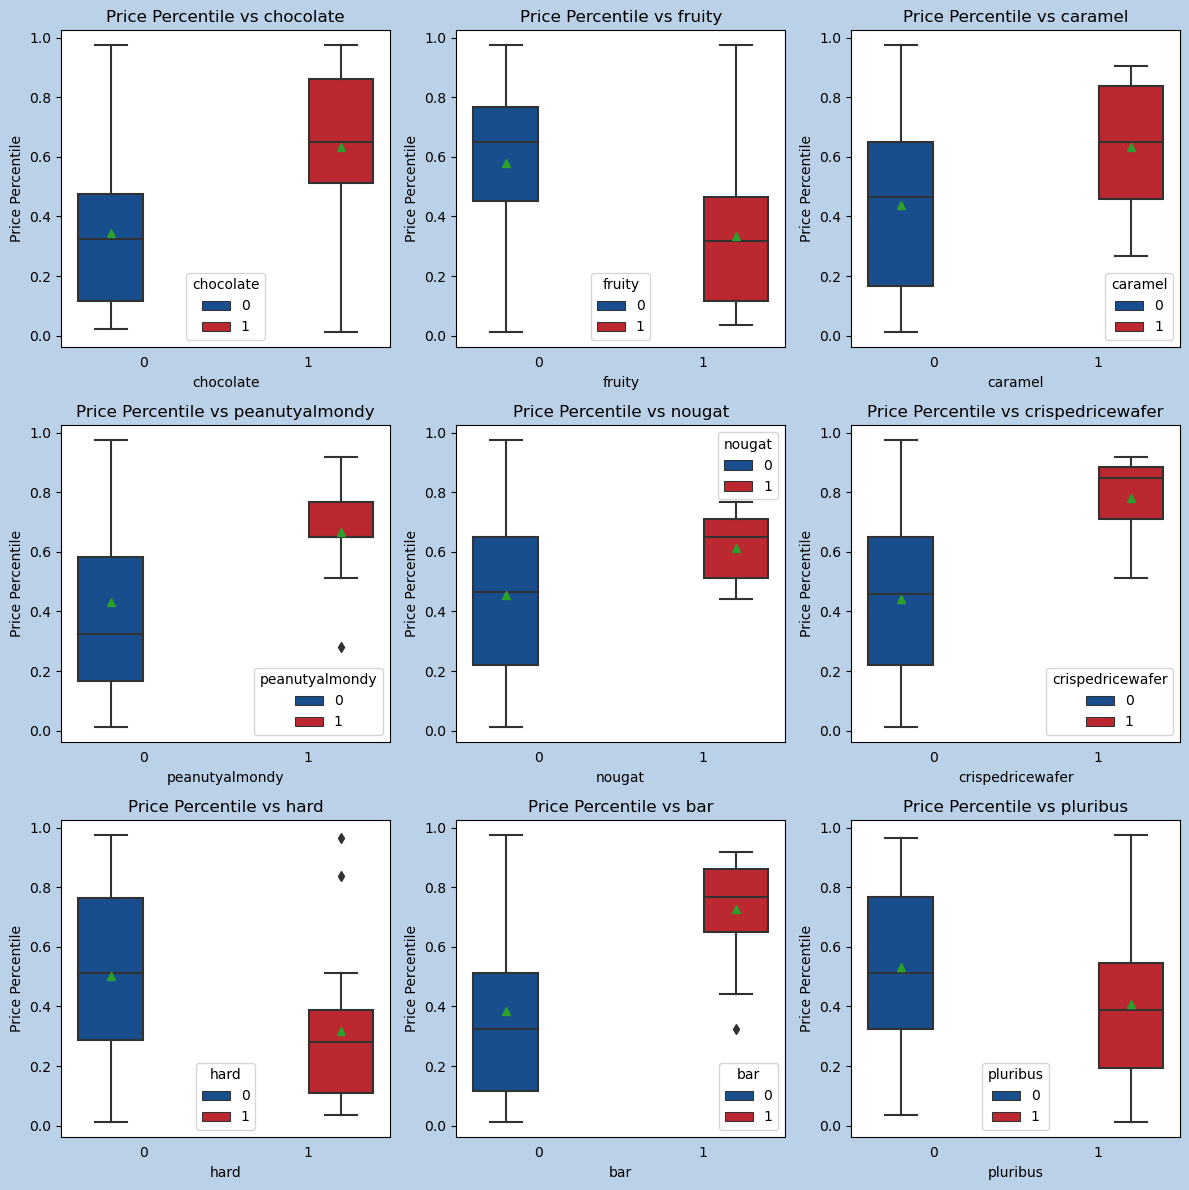

In [8]:
#lets do the same now for the boxplots vs price
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))  # Create a figure with 3x3 subplots

# Counter to iterate through axes
ax_counter = 0

for i in range(rows):
    for j in range(cols):
        if ax_counter >= len(binary_vars):  # Stop if all variables are plotted
            break

        var = binary_vars[ax_counter]

        # Subset data based on binary variable value
        data_0 = data.loc[data[var] == 0]
        data_1 = data.loc[data[var] == 1]

        # Create double boxplot on current axis
        sns.boxplot(
            x=var,
            y="pricepercent",
            showmeans=True,
            data=pd.concat([data_0, data_1], ignore_index=True),
            hue=var,
            palette=['#054DA1', '#D40F19'],
            ax=axes[i, j],
        )

        # Customize plot (optional)
        axes[i, j].set_title(f"Price Percentile vs {var}")
        axes[i, j].set_xlabel(var)
        axes[i, j].set_ylabel("Price Percentile")
        axes[i, j].tick_params(bottom=False)  # Remove x-axis ticks for inner subplots

        ax_counter += 1  # Increment counter

# Adjust spacing and display and background color
fig.patch.set_facecolor('#BBD1E8')
plt.tight_layout()
plt.savefig('binary_variables_comparison pricepercent.jpg', format='jpg')

plt.show()

------------------------------
<font color='green'><i>For the estimation of "pricepercent", according to the box and whiskers diagrams, "peanutyalmondy", "bar" and "crispedricewafer" seem to be the better estimators, followed by "chocolate". "fruity" is also a good candidate of estimating variable, although seems to correlate inversely.</i></font>

------------------------------

## 3.3. Correlations

Correlation matrix:
                   winpercent  pricepercent  sugarpercent  chocolate    fruity  \
winpercent          1.000000      0.345325      0.229151   0.636517 -0.380938   
pricepercent        0.345325      1.000000      0.329706   0.504675 -0.430969   
sugarpercent        0.229151      0.329706      1.000000   0.104169 -0.034393   
chocolate           0.636517      0.504675      0.104169   1.000000 -0.741721   
fruity             -0.380938     -0.430969     -0.034393  -0.741721  1.000000   
caramel             0.213416      0.254327      0.221933   0.249875 -0.335485   
peanutyalmondy      0.406192      0.309153      0.087889   0.377824 -0.399280   
nougat              0.199375      0.153196      0.123081   0.254892 -0.269367   
crispedricewafer    0.324680      0.328265      0.069950   0.341210 -0.269367   
hard               -0.310382     -0.244365      0.091810  -0.344177  0.390678   
bar                 0.429929      0.518407      0.099985   0.597421 -0.515066   
pluribu

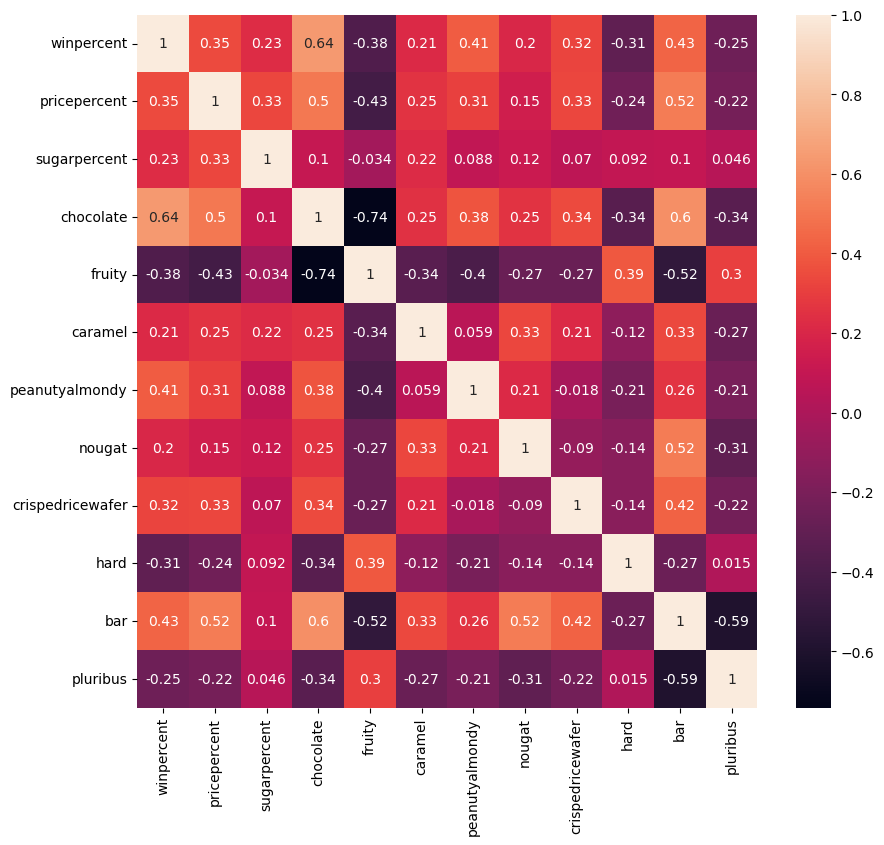

In [9]:
# Select numerical features
numerical_features = ["winpercent", "pricepercent", "sugarpercent"]

# Select categorical features (assuming no further encoding needed as mentioned)
categorical_features = [
    "chocolate",
    "fruity",
    "caramel",
    "peanutyalmondy",
    "nougat",
    "crispedricewafer",
    "hard",
    "bar",
    "pluribus",
]

# Calculate correlation matrix
correlation_matrix = data[numerical_features + categorical_features].corr()

# Print correlation matrix
print("Correlation matrix:\n", correlation_matrix)

# Visualize correlations with heatmap
plt.figure(figsize=(10,9))
sns.heatmap(correlation_matrix, annot=True )
plt.show()


------------------------------
<font color='green'><i>Based on the heatmap and on the numerical values of the correlations, the variables that correlate most with winpercent are: chocolate (0.6), bar (0.43), peanutyalmonty (0.41) then, the next one in value is fruity, which is negatively correlated (0.38).</i></font>
<font color='green'><i>In general terms: characteristics like fruity, hard or plurybus (many candies in a package) are not desirable for successful candy bars. On the contrary, seem to be desirable if the aim is to make cheap candy bars (even if they wont be successful). 
Concerning prices: bar, chocolate and crispedricewaferare the variables that have the strongest possitive correlation with price.fruity, hard or plurybus are the ones that have the strongest negative corrrelation.  </i></font>

------------------------------

## 3.4. Multicolinearity

{'winpercent': 14.881763662990025, 'pricepercent': 6.33144643074457, 'sugarpercent': 5.20798113292017, 'chocolate': 6.60833483899621, 'fruity': 4.797663548355253, 'caramel': 1.6319523034997916, 'peanutyalmondy': 1.7460731621738592, 'nougat': 1.9974015110843326, 'crispedricewafer': 1.716139642760731, 'hard': 1.5187924730965392, 'bar': 4.640487933642029, 'pluribus': 3.1432148518576692}


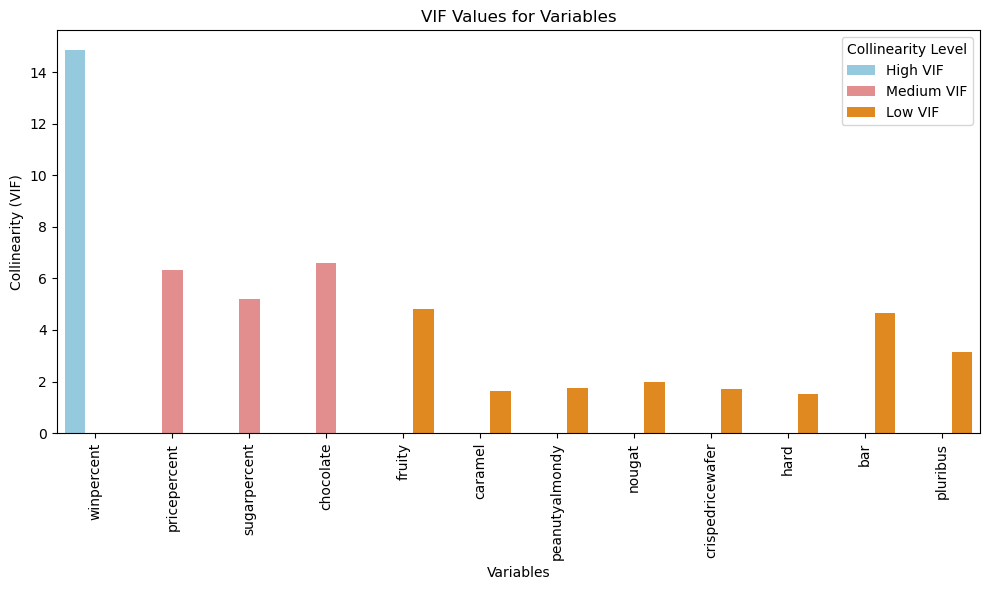

In [10]:


numerical_data = data[numerical_features + categorical_features]

vif_dict = {}
for i in range(numerical_data.shape[1]):
    vif = variance_inflation_factor(numerical_data.values, i)
    vif_dict[numerical_data.columns[i]] = vif

print(vif_dict)

low_vif_threshold = 5
high_vif_threshold = 10

# these lambda functions separate the data into groups.
groups = ["Low VIF" if v <= low_vif_threshold else ("Medium VIF" if v <= high_vif_threshold else "High VIF") for v in vif_dict.values()]
colors = ["skyblue", "lightcoral", "darkorange"]  

# Bar plot 
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed
bars = sns.barplot(x=list(vif_dict.keys()), y=list(vif_dict.values()), hue=groups, palette=colors, ax=ax)

# Label axes and set title
ax.set_xlabel("Variables")
ax.set_ylabel("Collinearity (VIF)")
ax.set_title("VIF Values for Variables")
plt.xticks(rotation=90)

# Add legend with title
ax.legend(title="Collinearity Level")

plt.tight_layout()
plt.show()

------------------------------
<font color='green'><i>The only variable with a high colinearity is winpercent. Since it is one of the variables to be estimated (dependent variables), the colinearity is not a problem.</i></font>
<font color='green'><i>Another dependent variable,  pricepercent, has a medium value of colinearitythe variables, have either a medium colinearity (pricepercent, sugarpercent and chocolate) or a low colinearity. All of them below 7. Since chocolate is the variable that best correlates with winpercent. It will not be excluded from the model. </i></font>
<font color='green'><h3>For the purpose of this case study, the colinearity will not be taken into account in the model, since it is not high.</h3></font>

------------------------------

## 3.5. Top 10 beloved candies

In [11]:
print(data.sort_values("winpercent", ascending=False).head(10))

                 competitorname  chocolate  fruity  caramel  peanutyalmondy  \
52    Reese's Peanut Butter cup          1       0        0               1   
51           Reese's Miniatures          1       0        0               1   
79                         Twix          1       0        1               0   
28                      Kit Kat          1       0        0               0   
64                     Snickers          1       0        1               1   
53               Reese's pieces          1       0        0               1   
36                    Milky Way          1       0        1               0   
54  Reese's stuffed with pieces          1       0        0               1   
32          Peanut butter M&M's          1       0        0               1   
42          Nestle Butterfinger          1       0        0               1   

    nougat  crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
52       0                 0     0    0         0

------------------------------
<font color='green'><i>It is clear that alll top 10 candies are with chocolate, no-fruity, no-hard.</i></font>
<font color='green'><i>8 out of ten are no-nougat, no-crispedricewafer and no-pluribus.</i></font>
<font color='green'><i>7 out of 10 are peanutyalmondy. </i></font>
<font color='green'><b>Candy bars based on Reese's Miniatures are a clear interesting candidate for a supermarket chain since it is the second most beloved candy bar and it is one of the cheapests.</b></font>

------------------------------

## 3.6. Top 10 cheapest candies
Here only the price is taken into account

In [12]:
print(data.sort_values("pricepercent", ascending=True).head(10))

          competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
76  Tootsie Roll Midgies          1       0        0               0       0   
48          Pixie Sticks          0       0        0               0       0   
15           Fruit Chews          0       1        0               0       0   
14              Dum Dums          0       1        0               0       0   
69   Strawberry bon bons          0       1        0               0       0   
57     Root Beer Barrels          0       0        0               0       0   
59               Sixlets          1       0        0               0       0   
22      Hershey's Kisses          1       0        0               0       0   
30             Lemonhead          0       1        0               0       0   
63        Smarties candy          0       1        0               0       0   

    crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
76                 0     0    0         1     

------------------------------
<font color='green'><i>The cheapest candies are, all with mediocre results in winpercent. </i></font>
<font color='green'><i>10 out of 10 are no-caramel, no-peanuty-almondy, no-nougat, no-crispedricedwafer, no bar.</i></font>
<font color='green'><i>8 out of 10 are pluribus (which is consistent with low prices)</i></font>

------------------------------

# 4. Analysis

## 4.1. Asumptions
Clearly, winpercent and pricepercent are the most interesting variables as target variables for the retail chain. On the one hand, a supermarket wants candies loved by consumers (high winpercent), on the other hand, supermarket looks for competitive prices, especially for home brand products (pricepercent).</i></font>
Notice that, while winpercent is of the type "the more, the better", pricepercent is of the type "the less, the better".

Therefore, a new target variable "cheapness" has bin created, defined as (1-pricepercent), so that the new variable will be of the type "the more the better":
<font color='blue'>     cheapness = (1 - pricepercent)</font>


In [13]:
# Calculate 'cheapness' column
data['cheapness'] = 1 - data['pricepercent']

# Create a dataframe that drops the competitorname (only non-numerical column)
numerical_data = data.drop(columns=['competitorname'])

# Drop the 'pricepercent' column from numerical_data
numerical_data.drop(columns=['pricepercent'], inplace=True)

# Define the desired column order
desired_order = ["winpercent", "cheapness", "sugarpercent", "chocolate", "fruity", "caramel", "peanutyalmondy", "nougat", "crispedricewafer", "hard", "bar", "pluribus"]

# Reorder the columns using .reindex()
numerical_data = numerical_data.reindex(columns=desired_order)

## 4.2. Which variables have in common loved and cheap candies

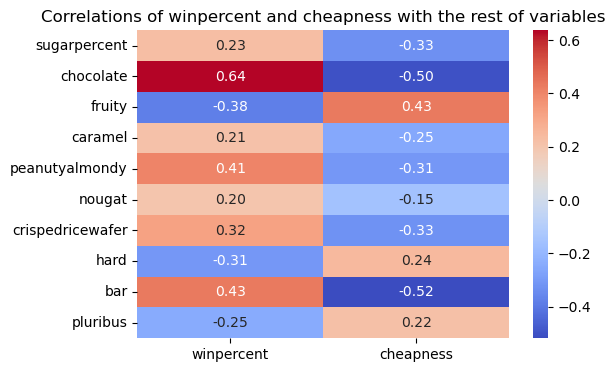

In [14]:
# Lets plot again the correlations but just for the first two columns, winpercent and cheapness
correlation_matrix_subset = numerical_data.corr().iloc[2:, :2]

plt.figure(figsize=(6, 4))  
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlations of winpercent and cheapness with the rest of variables')
plt.show()

------------------------------
<font color='green'><i>As we see in the graph, there are no variables "objectively good" for candy bars for a retail chain. All variables that are positively correlated with winpercent, are negatively correlated with cheapness and the other way round.</i></font>
<font color='green'><i>The variables that influence winpercent positively are: Chocolate, bar, peanutyalmondy crispedricewafer, caramel, nougat. </i></font>
<font color='green'><b>Correlation analysis does not seem to give the result of what features does the ideal candy bar have. However, the insights are still useful</b></font>

------------------------------

## 4.2. Analysis of quartiles

As best of the best we can classify candies that are in the top quartile of cheapness and in the top quartile of winpercent.


In [15]:
# Calculate quartiles for 'winpercent'
winpercent_quartiles = numerical_data['winpercent'].quantile([0.25, 0.5, 0.75])

# Calculate quartiles for 'cheapness'
cheapness_quartiles = numerical_data['cheapness'].quantile([0.25, 0.5, 0.75])

print("Quartiles of winpercent:")
print(winpercent_quartiles)

print("\nQuartiles of cheapness:")
print(cheapness_quartiles)


Quartiles of winpercent:
0.25    0.391411
0.50    0.478298
0.75    0.598640
Name: winpercent, dtype: float64

Quartiles of cheapness:
0.25    0.349
0.50    0.535
0.75    0.745
Name: cheapness, dtype: float64


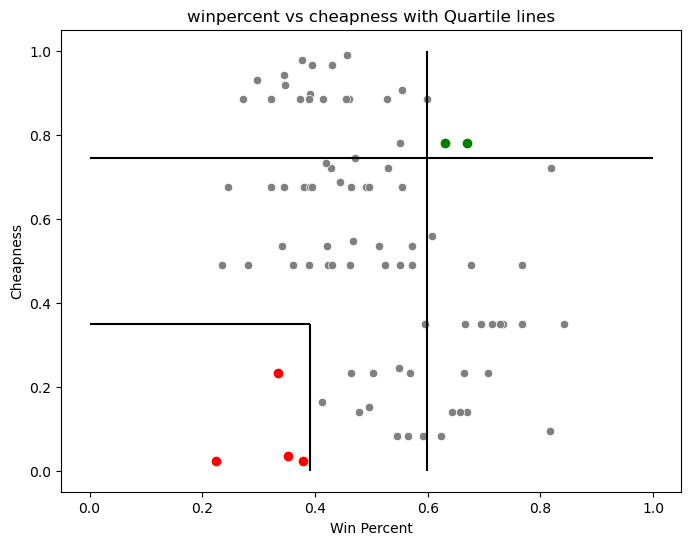

In [16]:
fig, ax = plt.subplots(figsize=(8, 6)) 

sns.scatterplot(x='winpercent', y='cheapness', data=data, color='grey')

# Add vertical lines at Q1 and Q3 of winpercent_quartiles
ax.vlines(color='black', x = [winpercent_quartiles[0.25], winpercent_quartiles[0.75]], 
          ymin = 0, # Starting point for all lines
          ymax = [cheapness_quartiles[0.25], 1], label=["Q1","Q3"]) 


# Add horizontal lines at Q1 and Q3 of cheapness_quartiles

ax.hlines(color='black', y =[cheapness_quartiles[0.25], cheapness_quartiles[0.75]], 
          xmin = 0, # Starting point for all lines
          xmax = [winpercent_quartiles[0.25], 1]) # End point for each line

# Create masks for different conditions
mask_green = (data['winpercent'] > winpercent_quartiles[0.75]) & (data['cheapness'] > cheapness_quartiles[0.75])
mask_red = (data['winpercent'] < winpercent_quartiles[0.25]) & (data['cheapness'] < cheapness_quartiles[0.25])

# Assign different colors to points based on conditions
ax.scatter(data.loc[mask_green, 'winpercent'], data.loc[mask_green, 'cheapness'], color='green', label='Q3 winpercent & Q3 cheapness')
ax.scatter(data.loc[mask_red, 'winpercent'], data.loc[mask_red, 'cheapness'], color='red', label='Q1 winpercent & Q1 cheapness')


plt.title('winpercent vs cheapness with Quartile lines')
plt.xlabel('Win Percent')
plt.ylabel('Cheapness')

plt.show()


------------------------------
<font color='green'><i>There are two candies <b>in green (Skittles original and Starburst)</b> that are on the top quartiles, both for winpercent and cheapness, those are the two most interesting for a retail chain. Since both are equally cheap, there are </i></font>
<font color='green'><i>There is one candy, in red that performs bad in both, price and winpercent. </i></font>

------------------------------

In [17]:
# Filter the candies that are both cheap and loved
print(data[(data['winpercent'] > winpercent_quartiles[0.75]) & (data['cheapness'] > cheapness_quartiles[0.75])])


       competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
60  Skittles original          0       1        0               0       0   
68          Starburst          0       1        0               0       0   

    crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
60                 0     0    0         1         0.941          0.22   
68                 0     0    0         1         0.151          0.22   

    winpercent  cheapness  
60    0.630851       0.78  
68    0.670376       0.78  


## 4.3. Ranking analysis
Through the analysis of rankings we can infer which candies are top ranked in winprice and cheapness and then build a total rank as the semi-sum of both ranks and reranking again.

In [18]:
data['winpercent_rank'] = data['winpercent'].rank(ascending=False, method="average")
data['cheapness_rank'] = data['cheapness'].rank(ascending=False, method="average")
data['total_rank'] = (data['winpercent_rank']+data['cheapness_rank']).rank(ascending=True, method="average")
print(data.sort_values('total_rank').head(5) )


        competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
51  Reese's Miniatures          1       0        0               1       0   
68           Starburst          0       1        0               0       0   
66     Sour Patch Kids          0       1        0               0       0   
22    Hershey's Kisses          1       0        0               0       0   
60   Skittles original          0       1        0               0       0   

    crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
51                 0     0    0         0         0.034         0.279   
68                 0     0    0         1         0.151         0.220   
66                 0     0    0         1         0.069         0.116   
22                 0     0    0         1         0.127         0.093   
60                 0     0    0         1         0.941         0.220   

    winpercent  cheapness  winpercent_rank  cheapness_rank  total_rank  
51    0.818663     

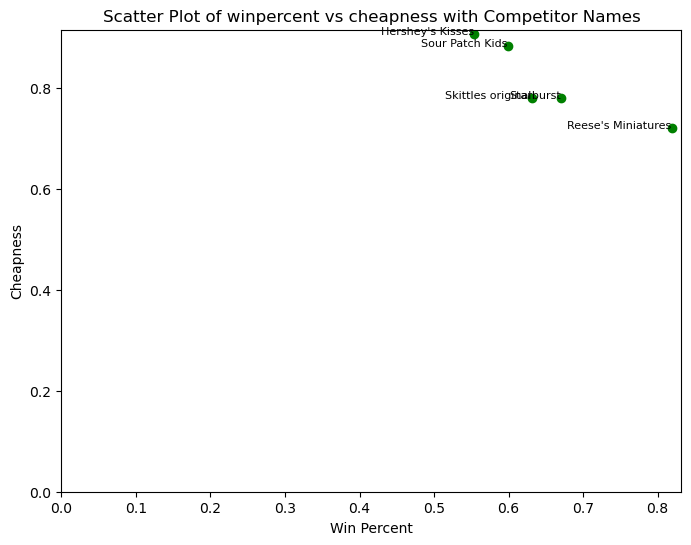

The top 5 candy bars are 51    Reese's Miniatures
68             Starburst
66       Sour Patch Kids
22      Hershey's Kisses
60     Skittles original
Name: competitorname, dtype: object


In [19]:
ranking_5=data.sort_values('total_rank').head(5)
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(ranking_5['winpercent'], ranking_5['cheapness'], color='green')

# Annotate each point with competitor name
for i, txt in enumerate(ranking_5['competitorname']):
    plt.text(ranking_5['winpercent'].iloc[i], ranking_5['cheapness'].iloc[i], txt, fontsize=8, ha='right')


plt.title('Scatter Plot of winpercent vs cheapness with Competitor Names')
plt.xlabel('Win Percent')
plt.ylabel('Cheapness')

# Set x and y-axis limits to start at 0
plt.xlim(0, None)  
plt.ylim(0, None)  

plt.show()
print("The top 5 candy bars are", ranking_5['competitorname'] )

------------------------------
<font color='green'><i>The rank analysis is consitent with the quartile analysis and allows us to identify more candies if wanted.</i></font>

<font color='green'><b> The top candies according to the rank analysis are: Reese's Miniatures, Starburst, Sour Patch Kids, Hershey's Kisses, Skittles original</b></font>

------------------------------

# 5. Discarded models
The following models have been evaluated and the results are exposed here, however, they have been discarded due to the lack of accuracy.

## 5.1. Model asumptions (discarded)
Since there are no data on the importance of the variables or the variables that are desired to be maximized, the following assumptions are made:

The retail chain cares about quality of its products. In this sense, the variable that best aligns with quality (at least as perceived quality) is winpercent. Therefore, for the new candy bar, the winpercent should be maximized.

The retail chain cares about the price of its products, especially those from home brands. The variable price is correlated with winpercent (the higher the winpercent, the higher the price in general terms). As it has been mentioned,  while winpercent is of the type "the more, the better", pricepercent is of the type "the less, the better".

Therefore, a new variable "cheapness" has been created, defined as (1-pricepercent), so that the new variable will be of the type "the more the better":

<font color='blue'>     target = Ww * winpercent + Wp * cheapness</font>

Where: Ww is the weight to be given to the winpercent variable (perceived quality), and Wp is the weight to be given to the pricepercent variable. Additionally,  "cheapness" is equal to (1 - pricepercent).

### 5.2. Weight estimation (discarded)
Usually wheight estimation comes from a consumer panel or form sentiment analysis of available information from stakeholders preferences. Since for this case study there is no information on how important is price compared to quality, wew can assume that price is as important as perceived quality for the retail chain. 

Notice that the wheights can be easily modified if more relevant information is provided and that it does not make a big difference in the results.

### 5.3 Logistic regression model (discarded)
Logistic regression is a widespread ML technique whenever there are categorial and numerical independent variables in the model. The only problem with logistic regression is that the target variable has to be also categorical. For this reason, in this case the target variable is split into 4 categories according to the quartiles.

In [20]:
# Create the new target variable to optimize:
numerical_data["target"] = numerical_data["winpercent"] + (numerical_data["cheapness"])

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

log_reg_data=numerical_data
# Define numerical features
log_reg_numerical = ["winpercent", "cheapness", "sugarpercent"]
# Scale the numerical variables
scaler = StandardScaler()

# Scale numerical features
log_reg_data[log_reg_numerical] = scaler.fit_transform(log_reg_data[log_reg_numerical])


# Split target variable into quartiles
log_reg_data['target_quartile'] = pd.qcut(log_reg_data['target'], q=4, labels=False)

# Select x_variables
x_variables = [
    "chocolate",
    "fruity",
    "caramel",
    "peanutyalmondy",
    "nougat",
    "crispedricewafer",
    "hard",
    "bar",
    "pluribus", 
    "sugarpercent"
]

# Select features and target variable
X = log_reg_data[x_variables]
y = log_reg_data["target_quartile"]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.47058823529411764


As it can bee seen, the result of the Logistic Regression Model is poor. With almost no accuracy, the model cannot be used for reliable predictions (Accuracy: 0.35294117647058826).
This is probably due to the lack of data, since there are only 85 observations. Therefore, it will not be used for recommendations for the retail chain.

#### Coefficients of the model

In [21]:
# Get the coefficients and intercept of the model
coefficients = model.coef_[0]
intercept = model.intercept_

# Create a DataFrame to display the coefficients
coefficients_df = pd.DataFrame({"Feature": x_variables, "Coefficient": coefficients})

# Add the intercept to the DataFrame
coefficients_df = coefficients_df.append({"Feature": "Intercept", "Coefficient": intercept[0]}, ignore_index=True)

print("Coefficients:")
print(coefficients_df)

Coefficients:
             Feature  Coefficient
0          chocolate    -0.505709
1             fruity    -0.585758
2            caramel    -0.006973
3     peanutyalmondy     0.145830
4             nougat     0.008482
5   crispedricewafer    -0.096124
6               hard     0.333883
7                bar     1.219606
8           pluribus     0.442362
9       sugarpercent     0.060675
10         Intercept    -0.050955


### 5.4. Decision-Tree model (discarded)

Decision tree models are also widespread ML models and adequate whenever there is a combination of numerical and categorical variables. Decision-Tree Regression, unlike LogReg does not require the target variable to be categorical, therefore, no transformation is needed. 

-0.01155442423895825


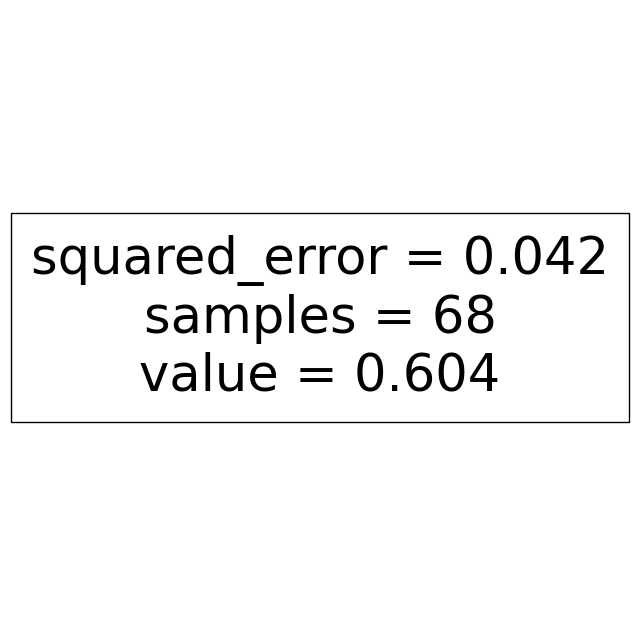

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler

tree_data=numerical_data

# Select numerical features
tree_numerical = ["winpercent", "cheapness", "sugarpercent","target"]

# Scale numerical features using StandardScaler
scaler = MinMaxScaler()
tree_data[tree_numerical] = scaler.fit_transform(tree_data[tree_numerical])

# Select categorical features (assuming no further encoding needed as mentioned)
x_tree = [
    "chocolate",
    "fruity",
    "caramel",
    "peanutyalmondy",
    "nougat",
    "crispedricewafer",
    "hard",
    "bar",
    "pluribus",
    "sugarpercent"]



X = tree_data[x_tree]
y = tree_data['target']
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)
dt = DecisionTreeRegressor(max_depth=3, ccp_alpha=0.01)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(dt.score(x_test, y_test))

#to visualize the tree 

plt.figure(figsize=(8,8))
plot_tree(dt, feature_names = x_train.columns,  
               max_depth=4, filled=True);



Best Parameters: {'ccp_alpha': 0.001, 'max_depth': 1}
Model Score: 0.09172903692772516


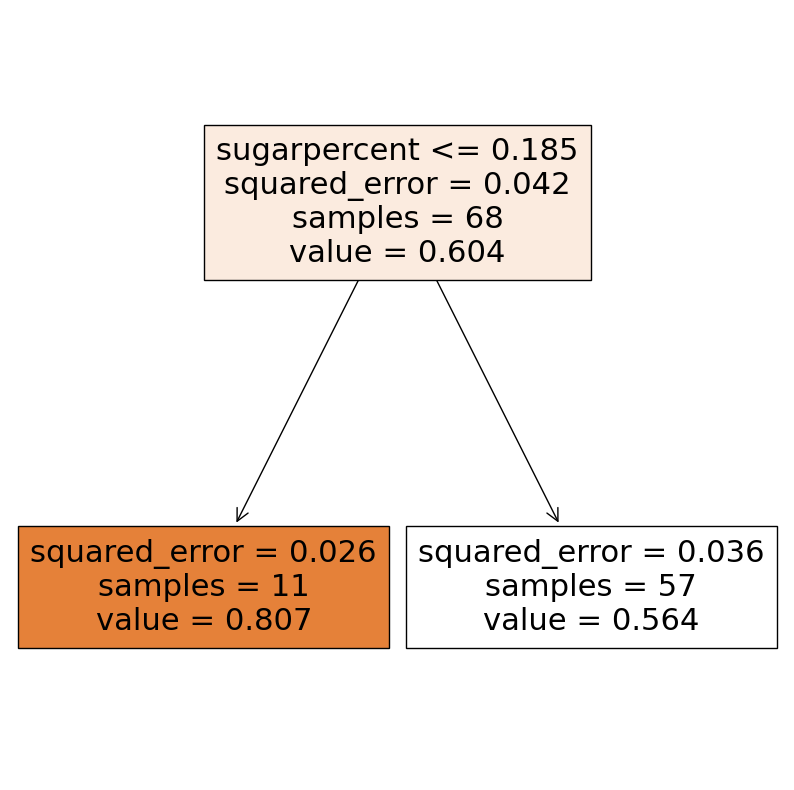

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid to search
param_grid = {
    'max_depth': range(1, 11),  # Try depths from 1 to 10
    'ccp_alpha': [0.001, 0.01, 0.1, 0.5, 1.0]  # Try different alpha values
}

# Create the grid search object
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=0),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Use mean squared error as the scoring metric
    n_jobs=-1  # Use all available CPU cores
)

# Perform grid search on training data
grid_search.fit(x_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Use the best estimator for prediction
y_pred = best_estimator.predict(x_test)

# Evaluate the performance of the model
score = best_estimator.score(x_test, y_test)
print("Model Score:", score)

# Visualize the tree
plt.figure(figsize=(10,10))
plot_tree(best_estimator, feature_names=x_train.columns, max_depth=4, filled=True);

The result of the Regression tree analysis is also poor, also it is likely to be caused by the lack of observations. Even for the best combinations of parameters, the result is poor, being 0.34 the model score and the optimal depth of the tree is 1 (it means, the prediction of the target variable only depends on whether the bar has chocolate or not. 
Best Parameters: {'ccp_alpha': 0.001, 'max_depth': 1}
Model Score: 0.34196423969044676
Similar tries have been wone using winpercent as target variable or pricepercent as target variable, all witht similarly poor results for Regression-Tree